In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Plot and table configs
plt.style.use('default')
sns.set(palette="colorblind", color_codes=True, context="talk")
sns.set_style('ticks', {
                        "xtick.top": True,
                        "xtick.direction": "in",
                        "ytick.right": True,
                        "ytick.direction": "in",
                        "axes.spine.right": True})
params = {
            'xtick.minor.visible':True,
            'ytick.minor.visible':True,
            'font.size':10
}
plt.rcParams.update(params)

## Exoplanet Archive data

In [3]:
# Load data and select only targets detected via transit
df = pd.read_csv("./exoplanet_archive.csv", comment='#')
df = df.dropna()
df = df[df.pl_discmethod.str.match("Transit")]
df_exoarchive = df
df_exoarchive

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_eqt,pl_rade
65,CoRoT-1,b,CoRoT-1 b,Transit,1898.0,16.700
66,CoRoT-10,b,CoRoT-10 b,Transit,600.0,10.870
67,CoRoT-11,b,CoRoT-11 b,Transit,1657.0,16.030
68,CoRoT-12,b,CoRoT-12 b,Transit,1442.0,16.140
69,CoRoT-13,b,CoRoT-13 b,Transit,1700.0,9.920
...,...,...,...,...,...,...
4104,Wolf 503,b,Wolf 503 b,Transit,805.0,2.030
4111,XO-5,b,XO-5 b,Transit,1230.0,12.780
4112,XO-6,b,XO-6 b,Transit,1577.0,23.203
4113,XO-7,b,XO-7 b,Transit,1743.0,15.390


## ACCESS data

In [22]:
df = pd.read_csv("./ACCESS.csv")
df = df.dropna()
df_ACCESS = df
df_ACCESS

,Planet,R_E,T_eq,Case,Status
0,GJ1214b,2.850,604,0,2
1,W19b,15.600,2520,0,2
2,W4b,14.900,1664,0,2
3,W43b,11.280,1427,1,2
4,W50b,13.070,1395,0,1
5,HP23b,13.720,1951,0,1
6,W103b,18.450,2489,0,1
7,W96b,13.450,1285,0,1
8,W98b,12.820,1171,0,1
9,W31b,17.400,1580,0,2


## Display

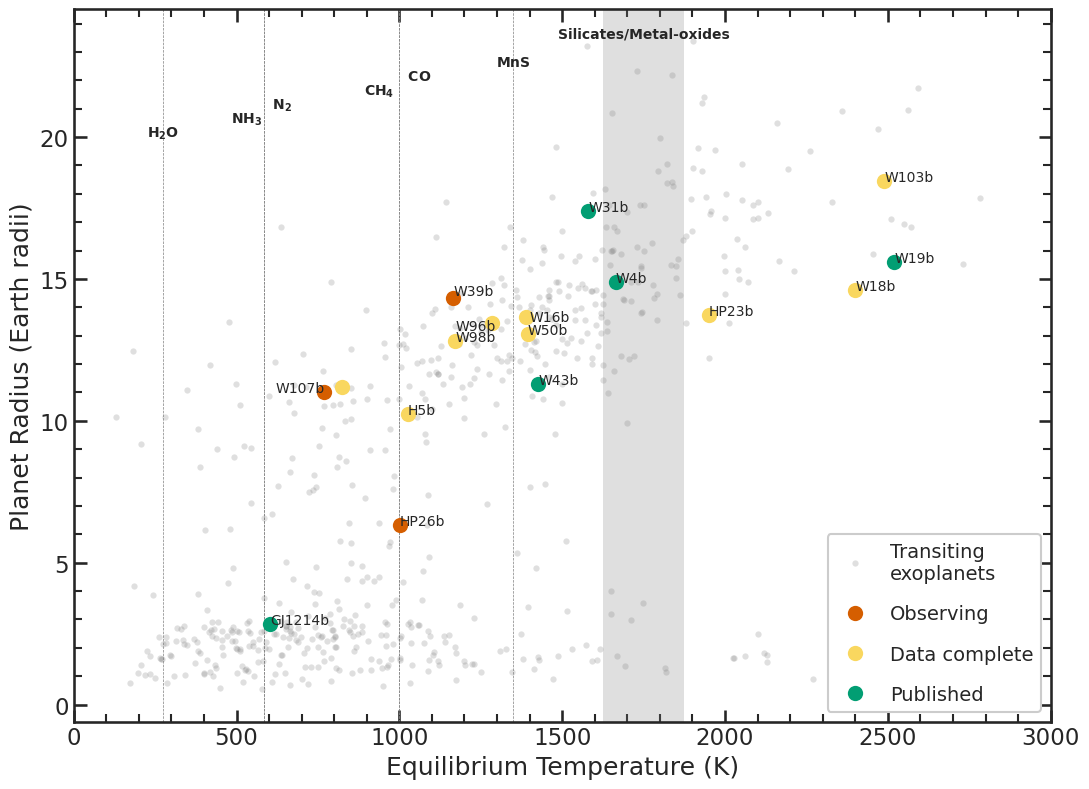

In [54]:
fig, ax = plt.subplots(figsize=(11, 8))

#########################
# Transition temperatures
#########################
temps = {
    "$\mathbf{H_2O}$":[273.15, "center"],
    "$\mathbf{NH_3}$ ":[583, "right"],
    "  $\mathbf{N_2}$":[583, "left"],
    "$\mathbf{CH_4}$  ":[1000, "right"],
    "  $\mathbf{CO}$":[1000, "left"],
    "$\mathbf{MnS}$":[1350, "center"],
}
y = 20
for name, data in temps.items():
    ax.axvline(data[0], ls='--', lw=0.5, color='grey')
    ax.annotate(name, xy=(data[0], y), ha=data[1])
    #plt.text(data[0], y, name, ha=data[1], fontweight="bold")
    y += 0.5
ax.axvspan(1625, 1875, color="grey", alpha=0.25, lw=0)    
ax.annotate("Silicates/Metal-oxides", xy=(1750, 23.5), ha="center", weight="bold")


#############
# All planets
#############
T_eq = df_exoarchive["pl_eqt"] # K
R_Earth = df_exoarchive["pl_rade"]
plot_kwargs_all = {
    "linestyle":"none",
    "marker":'.',
    "markeredgewidth":0,
    "color":"grey",
    "alpha":0.25,
}
ax.plot(T_eq, R_Earth, **plot_kwargs_all, label="Transiting\nexoplanets")

################
# ACCESS targets
################
names = df_ACCESS["Planet"] # e.g. W107
T_eq = df_ACCESS["T_eq"] # K
R_Earth = df_ACCESS["R_E"] # Earth radii
ms = 11

# Observing
mask = df_ACCESS["Status"] == 0
plot_kwargs = {
    "linestyle":"none",
    "marker":'o',
    "ms":ms,
    "color":'r',
    "markeredgewidth":0,
    "label":"Observing"
}
ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs)
for name, x, y in zip(names[mask], T_eq[mask], R_Earth[mask]):
    if name == "W39b":
        ax.annotate(name, xy=(x, y+0.1))
    elif name == "W107b":
        ax.annotate(name, xy=(x, y), ha="right")
    else:
        ax.annotate(name, xy=(x, y))  

# Data complete
mask = df_ACCESS["Status"] == 1
plot_kwargs = {
    "linestyle":"none",
    "marker":'o',
    "ms":ms,
    "color":"#f9d75f",
    "markeredgewidth":0,
    "label":"Data complete"
}
ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs)
for name, x, y in zip(names[mask], T_eq[mask], R_Earth[mask]):
    if name == "W107b":
        ax.annotate(name, xy=(x, y), ha="right")
    elif name == "W16b":
        ax.annotate(name, xy=(x+10, y), va="center")
    elif name == "W80b":
        pass
    elif name == "W96b":
        ax.annotate(name, xy=(x+10, y-.1), ha="right", va="center")
    else:
        ax.annotate(name, xy=(x, y))

# Published
mask = df_ACCESS["Status"] == 2
plot_kwargs = {
    "linestyle":"none",
    "marker":'o',
    "ms":ms,
    "color":'g',
    "markeredgewidth":0,
    "label":"Published"
}
ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs)
for name, x, y in zip(names[mask], T_eq[mask], R_Earth[mask]):
    ax.annotate(name, xy=(x, y))

# # Science Case 1
# mask = df_ACCESS["Case"] == 1
# plot_kwargs = {
#     "linestyle":"none",
#     "marker":'+',
#     "markersize":10,
#     "color":'k',
#     "label":"Science Case 1"
# }
# ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs_all) # Some values missing in archive
# ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs)
# for name, x, y in zip(names[mask], T_eq[mask], R_Earth[mask]):
#     if name == "HP26b":
#         pass
#     elif name == "W43b":
#         pass
#     elif name == "W107b":
#         pass
#     else:
#         ax.annotate(name, xy=(x, y))

# Science Case 3
# mask = df_ACCESS["Case"] == 3
# plot_kwargs = {
#     "linestyle":"none",
#     "marker":'x',
#     "markersize":8,
#     "color":'k',
#     "label":"Science Case 3"
# }
# ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs_all) # Some values missing in archive
# ax.plot(T_eq[mask], R_Earth[mask], **plot_kwargs)
# for name, x, y in zip(names[mask], T_eq[mask], R_Earth[mask]):
#     if name == "W25b":
#         ax.annotate(name, xy=(x, y), ha="right", va="top")
#     else:
#         ax.annotate(name, xy=(x, y))

        
ax.legend(framealpha=1, fontsize=14, loc=4, labelspacing=1.1)
ax.set_xlim(0, 3000)
ax.set_xlabel("Equilibrium Temperature (K)")
ax.set_ylabel("Planet Radius (Earth radii)")
fig.tight_layout()

plt.savefig("./transition_temp.png", dpi=250, bbox_inches="tight")